# MODEL PEFORMANCE EVALUATION AND INTERPRETATION

## IMPORTING LIBRARIES AND DATA FILES

In [1]:
#Data Processing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Metrics, Reports
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#NOT OVERSAMPLED DATA
data_NoOversample=pd.read_csv(r"C:\Users\Komal\Documents\venv_\data_clean_std.csv")
data_NoOversample

,Unnamed: 0,hour_inst,0,isFraud,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud,origName_num,destName_num
0,2,1,0.0,1,-0.357467,-0.188847,-0.438259,0,1305486145,553264065
1,3,1,1.0,1,-0.357467,-0.188847,-0.438259,0,840083671,38997010
2,15,1,1.0,0,-0.099576,-0.128591,-0.427245,0,905080434,476402209
3,19,1,0.0,0,-0.115146,-0.186762,-0.438259,0,1670993182,1100439041
4,24,1,0.0,0,-0.006590,-0.146456,0.143134,0,1984094095,932583850
...,...,...,...,...,...,...,...,...,...,...
2770404,6362615,23,1.0,1,0.024945,1.161997,-0.365631,0,786484425,776919290
2770405,6362616,23,0.0,1,6.751458,24.922965,-0.438259,0,1529008245,1881841831
2770406,6362617,23,1.0,1,6.751458,24.922965,0.925844,0,1162922333,1365125890
2770407,6362618,23,0.0,1,0.599766,3.192516,-0.438259,0,1685995037,2080388513


In [3]:
# SMOTE DATA
data_smt=pd.read_csv("data_smt.csv")
data_smt

,Unnamed: 0,hour_inst,0,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud,origName_num,destName_num,isFraud
0,0,1,0.000000,-0.357467,-0.188847,-0.438259,0,1.305486e+09,5.532641e+08,1
1,1,1,1.000000,-0.357467,-0.188847,-0.438259,0,8.400837e+08,3.899701e+07,1
2,2,1,1.000000,-0.099576,-0.128591,-0.427245,0,9.050804e+08,4.764022e+08,0
3,3,1,0.000000,-0.115146,-0.186762,-0.438259,0,1.670993e+09,1.100439e+09,0
4,4,1,0.000000,-0.006590,-0.146456,0.143134,0,1.984094e+09,9.325838e+08,0
...,...,...,...,...,...,...,...,...,...,...
5524387,5524387,21,1.000000,2.209439,8.878579,0.194944,0,1.674460e+09,5.521628e+08,1
5524388,5524388,21,0.784301,0.132743,1.542788,-0.356129,0,4.773347e+08,7.193603e+08,1
5524389,5524389,15,0.423610,-0.122661,0.640589,-0.396796,0,6.350794e+08,1.282578e+09,1
5524390,5524390,19,0.049081,1.737213,7.210472,-0.436633,0,1.501832e+09,3.719206e+07,1


In [4]:
data_NoOversample=data_NoOversample.drop(["Unnamed: 0","origName_num","destName_num"],axis=1)
data_smt=data_smt.drop(["Unnamed: 0","origName_num","destName_num"],axis=1)

In [5]:
x_T_NO=data_NoOversample.drop(['isFlaggedFraud','hour_inst','isFraud'],axis=1)
y_T_NO=data_NoOversample[['isFraud']]
x_T_smt=data_smt.drop(['isFlaggedFraud','hour_inst','isFraud'],axis=1)
y_T_smt=data_smt[['isFraud']]

In [7]:
x_T_NO=data_NoOversample[data_NoOversample['0']==0].drop(['isFlaggedFraud','hour_inst','isFraud'],axis=1)
y_T_NO=data_NoOversample[data_NoOversample['0']==0][['isFraud']]
x_C_NO=data_NoOversample[data_NoOversample['0']==1].drop(['isFlaggedFraud','hour_inst','isFraud'],axis=1)
y_C_NO=data_NoOversample[data_NoOversample['0']==1][['isFraud']]
print("\nNon-Oversampled set:\n")
print(len(x_T_NO),len(y_T_NO))
print(len(x_C_NO),len(y_C_NO))


x_T_O=data_smt[data_smt['0']==0].drop(['isFlaggedFraud','hour_inst','isFraud'],axis=1)
y_T_O=data_smt[data_smt['0']==0][['isFraud']]
x_C_O=data_smt[data_smt['0']==1].drop(['isFlaggedFraud','hour_inst','isFraud'],axis=1)
y_C_O=data_smt[data_smt['0']==1][['isFraud']]
print("\nOversampled set:\n")
print(len(x_T_O),len(y_T_O))
print(len(x_C_O),len(y_C_O))


Non-Oversampled set:

532909 532909
2237500 2237500

Oversampled set:

1226698 1226698
2936301 2936301


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca_T_NO=PCA(n_components=2)
pca_C_NO=PCA(n_components=2)
x_T_NO_trans=pca_T_NO.fit_transform(x_T_NO)
x_C_NO_trans=pca_C_NO.fit_transform(x_C_NO)

pca_T_O=PCA(n_components=2)
pca_C_O=PCA(n_components=2)
x_T_O_trans=pca_T_O.fit_transform(x_T_O)
x_C_O_trans=pca_C_O.fit_transform(x_C_O)

In [10]:
y_T_NO['Transfer_PC1']=x_T_NO_trans[:,0].tolist()
y_T_NO['Transfer_PC2']=x_T_NO_trans[:,1].tolist()
y_C_NO['Cashout_PC1']=x_C_NO_trans[:,0].tolist()
y_C_NO['Cashout_PC2']=x_C_NO_trans[:,1].tolist()

y_T_O['Transfer_PC1']=x_T_O_trans[:,0].tolist()
y_T_O['Transfer_PC2']=x_T_O_trans[:,1].tolist()
y_C_O['Cashout_PC1']=x_C_O_trans[:,0].tolist()
y_C_O['Cashout_PC2']=x_C_O_trans[:,1].tolist()

<Axes: title={'center': 'Oversampled: SMOTE'}, xlabel='Transfer_PC1', ylabel='Transfer_PC2'>

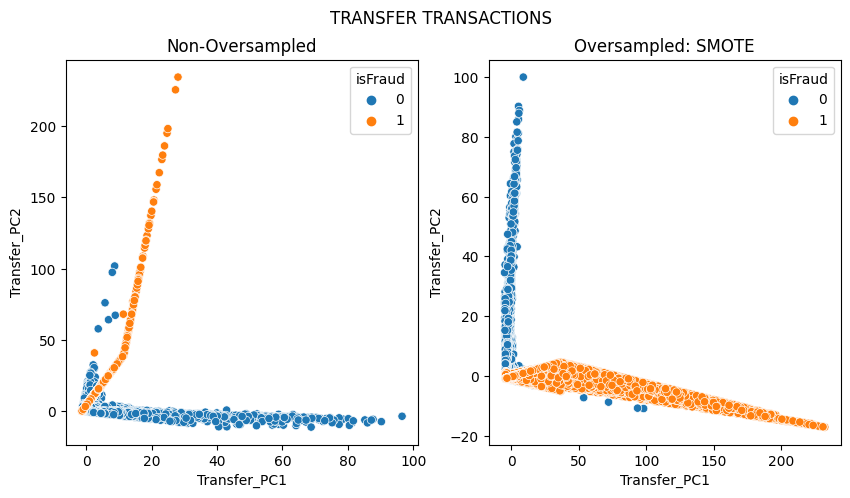

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('TRANSFER TRANSACTIONS')
axes[0].set_title('Non-Oversampled')
axes[1].set_title('Oversampled: SMOTE')
sns.scatterplot(ax=axes[0],data=y_T_NO,x=y_T_NO['Transfer_PC1'],y=y_T_NO['Transfer_PC2'],hue='isFraud')
sns.scatterplot(ax=axes[1],data=y_T_O,x=y_T_O['Transfer_PC1'],y=y_T_O['Transfer_PC2'],hue='isFraud')

<Axes: title={'center': 'Oversampled: SMOTE'}, xlabel='Cashout_PC1', ylabel='Cashout_PC2'>

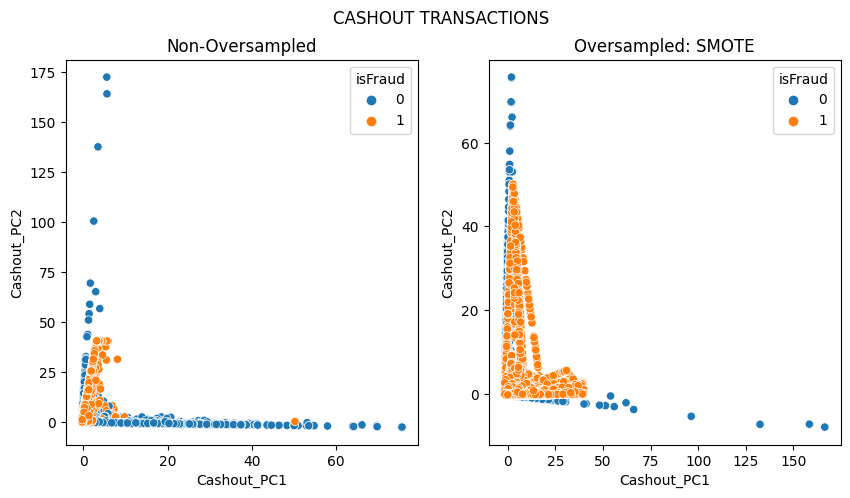

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('CASHOUT TRANSACTIONS')
axes[0].set_title('Non-Oversampled')
axes[1].set_title('Oversampled: SMOTE')
sns.scatterplot(ax=axes[0],data=y_C_NO,x=y_C_NO['Cashout_PC1'],y=y_C_NO['Cashout_PC2'],hue='isFraud')
sns.scatterplot(ax=axes[1],data=y_C_O,x=y_C_O['Cashout_PC1'],y=y_C_O['Cashout_PC2'],hue='isFraud')

## FUNCTIONS

In [13]:
## PLOT CONFUSION MATRIX

def Plot_Confusion_Matrix(CNF_Matrix,classes=[0,1]):

    #Plotting Confusion Matrix
    class_names= classes # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(CNF_Matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("bottom")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [15]:
## PRINT ROC CURVE
def Plot_ROC(classifier, test_set_x, test_set_y):
    y_pred_proba = classifier.predict_proba(test_set_x)[::,1]
    fpr, tpr, _ = metrics.roc_curve(test_set_y,  y_pred_proba)
    auc = metrics.roc_auc_score(test_set_y, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

## DATA SPLIT

#### A] NON-OVERSAMPLED DATA SET

In [17]:
#Splitting to test and train sets
x_train_NO,x_test_NO,y_train_NO,y_test_NO = train_test_split(data_NoOversample.drop(["isFraud"],axis=1),data_NoOversample["isFraud"],test_size=0.3,shuffle=True,random_state=42,stratify=data_NoOversample["isFraud"])

#### B] OVERSAMPLED DATA SET

#### COMPLETE OVERSAMPLED DATA

In [21]:
#Splitting to test and train sets
x_train_smt, x_test_smt, y_train_smt, y_test_smt = train_test_split(data_smt.drop(["isFraud"],axis=1),data_smt["isFraud"],test_size=0.3,shuffle=True,random_state=42,stratify=data_smt["isFraud"])

#### TRANSFERS ONLY

In [19]:
data_transfers = data_NoOversample[data_NoOversample['0']==0]
data_transfers

,hour_inst,0,isFraud,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud
0,1,0.0,1,-0.357467,-0.188847,-0.438259,0
3,1,0.0,0,-0.115146,-0.186762,-0.438259,0
4,1,0.0,0,-0.006590,-0.146456,0.143134,0
9,1,0.0,0,-0.287146,0.125220,-0.436467,0
14,1,0.0,0,-0.309560,-0.148333,-0.433118,0
...,...,...,...,...,...,...,...
2770399,22,0.0,1,-0.286238,0.062763,-0.438259,0
2770401,23,0.0,1,1.060254,4.819160,-0.438259,0
2770403,23,0.0,1,0.024945,1.161997,-0.438259,0
2770405,23,0.0,1,6.751458,24.922965,-0.438259,0


In [22]:
x_train_transfers, x_test_transfers, y_train_transfers, y_test_transfers = train_test_split(data_transfers.drop(["isFraud"],axis=1),data_transfers["isFraud"],test_size=0.3,shuffle=True,random_state=42,stratify=data_transfers["isFraud"])

## IMPLEMENTATIONS

### 1) LOGISTIC REGRESSION

#### i) Non-Oversampled Data

In [49]:
from sklearn.linear_model import LogisticRegression
    
Log_Reg_NO = LogisticRegression(random_state=42)

In [51]:
Log_Reg_NO.fit(x_train_NO,y_train_NO)

y_pred_NO_LogReg = Log_Reg_NO.predict(x_test_NO)

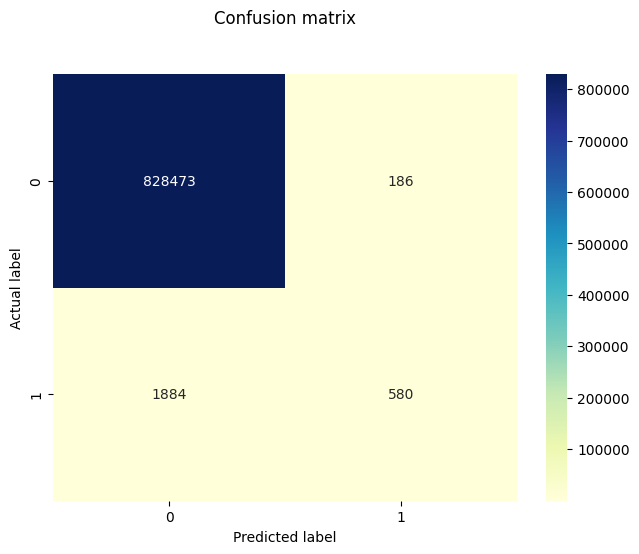

In [52]:
#Confusion Matrix
LogRegNO_cnfMat = metrics.confusion_matrix(y_test_NO, y_pred_NO_LogReg)

Plot_Confusion_Matrix(LogRegNO_cnfMat)

In [53]:
#Classification Report
print("Classification report for Logistic Regression on Non-Oversampled Data: \n")
print(classification_report(y_test_NO, y_pred_NO_LogReg, target_names=['not Fraud', 'Fraud']))

Classification report for Logistic Regression on Non-Oversampled Data: 

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.76      0.24      0.36      2464

    accuracy                           1.00    831123
   macro avg       0.88      0.62      0.68    831123
weighted avg       1.00      1.00      1.00    831123



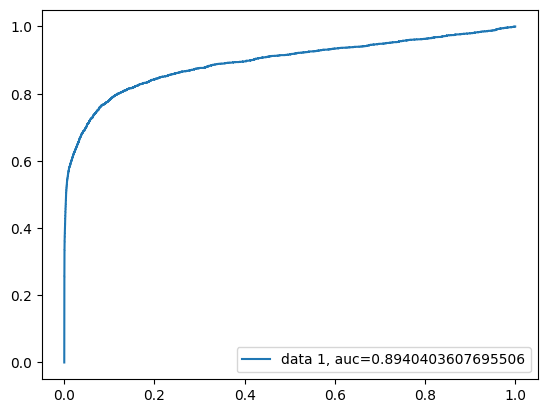

In [54]:
Plot_ROC(Log_Reg_NO, x_test_NO, y_test_NO)

#### ii) Complete Oversampled Data

In [55]:
from sklearn.linear_model import LogisticRegression
    
Log_Reg_SMT = LogisticRegression(random_state=42)

In [56]:
Log_Reg_SMT.fit(x_train_smt,y_train_smt)

y_pred_smt_LogReg = Log_Reg_SMT.predict(x_test_smt)

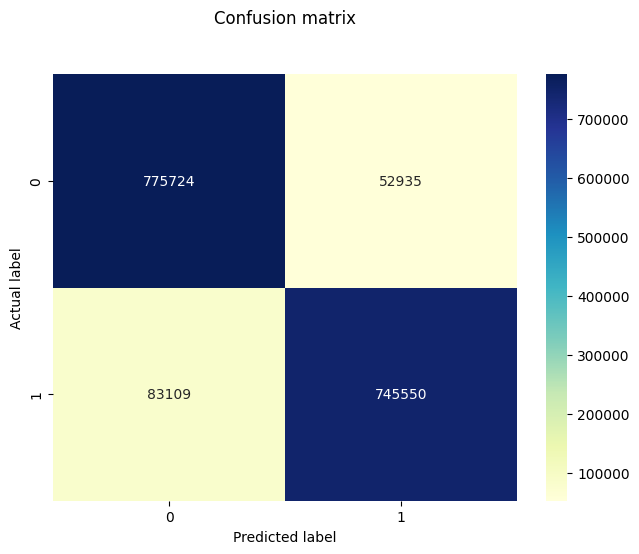

In [57]:
#Confusion Matrix
LogRegSMT_cnfMat = metrics.confusion_matrix(y_test_smt, y_pred_smt_LogReg)

Plot_Confusion_Matrix(LogRegSMT_cnfMat)

In [58]:
#Classification Report
print("Classification report for Logistic Regression on Complete Oversampled Data: \n")
print(classification_report(y_test_smt, y_pred_smt_LogReg, target_names=['not Fraud', 'Fraud']))

Classification report for Logistic Regression on Complete Oversampled Data: 

              precision    recall  f1-score   support

   not Fraud       0.90      0.94      0.92    828659
       Fraud       0.93      0.90      0.92    828659

    accuracy                           0.92   1657318
   macro avg       0.92      0.92      0.92   1657318
weighted avg       0.92      0.92      0.92   1657318



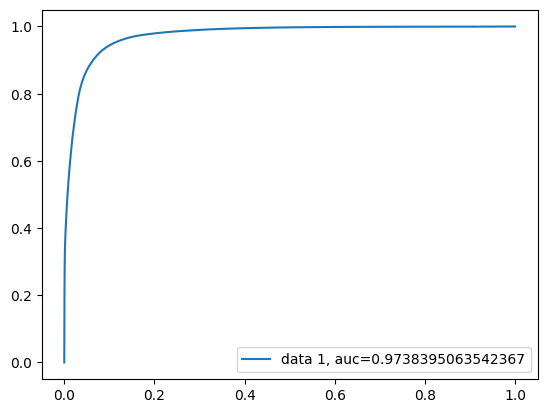

In [59]:
Plot_ROC(Log_Reg_SMT, x_test_smt, y_test_smt)

#### iii)Transfers Only

In [60]:
from sklearn.linear_model import LogisticRegression
    
Log_Reg_transfers = LogisticRegression(random_state=42)

In [62]:
Log_Reg_transfers.fit(x_train_transfers,y_train_transfers)

y_pred_transfers_LogReg = Log_Reg_transfers.predict(x_test_transfers)

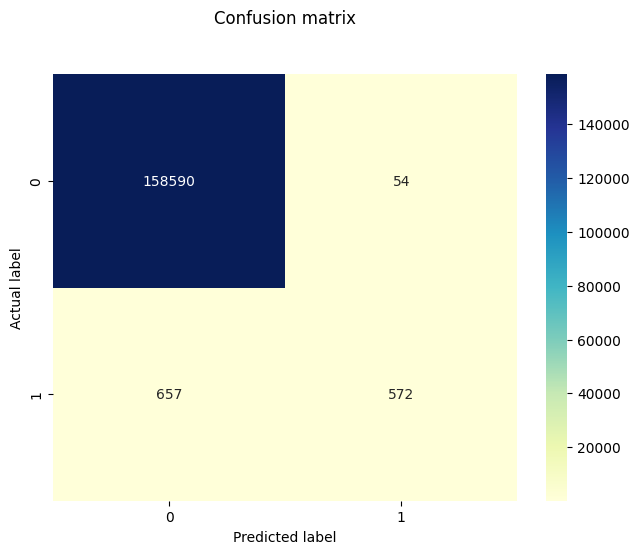

In [63]:
#Confusion Matrix
LogReg_transfers_cnfMat = metrics.confusion_matrix(y_test_transfers, y_pred_transfers_LogReg)

Plot_Confusion_Matrix(LogReg_transfers_cnfMat,classes=[0,1])

In [64]:
#Classification Report
print("Classification report for Logistic Regression on Transfers Only Data: \n")
print(classification_report(y_test_transfers, y_pred_transfers_LogReg, target_names=['not Fraud', 'Fraud']))

Classification report for Logistic Regression on Transfers Only Data: 

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    158644
       Fraud       0.91      0.47      0.62      1229

    accuracy                           1.00    159873
   macro avg       0.95      0.73      0.81    159873
weighted avg       1.00      1.00      0.99    159873



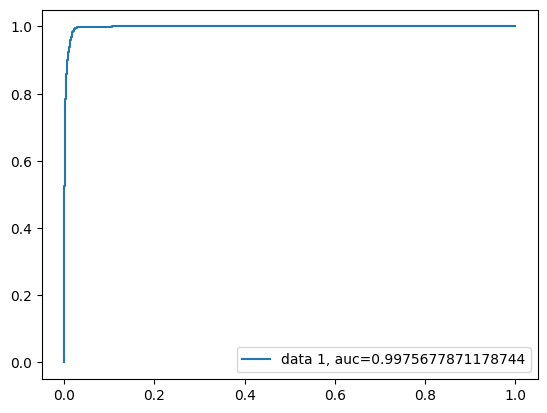

In [67]:
Plot_ROC(Log_Reg_transfers, x_test_transfers, y_test_transfers)

In [123]:
#Plotting ROC curves for all values of k
y_LogReg_NO_proba = Log_Reg_NO.predict_proba(x_test_NO)[::,1]
y_LogReg_SMT_proba = Log_Reg_SMT.predict_proba(x_test_smt)[::,1]
y_LogReg_transfers_proba = kNN10_SMT.predict_proba(x_test_transfers)[::,1]

fprLR_NO, tprLR_NO, _ = metrics.roc_curve(y_test_NO,  y_LogReg_NO_proba)
fprLR_SMT, tprLR_SMT, _ = metrics.roc_curve(y_test_smt,  y_LogReg_SMT_proba)
fprLR_transfers, tprLR_transfers, _ = metrics.roc_curve(y_test_transfers,  y_LogReg_transfers_proba)

aucLR_NO = metrics.roc_auc_score(y_test_NO, y_LogReg_NO_proba)
aucLR_SMT = metrics.roc_auc_score(y_test_smt, y_LogReg_SMT_proba)
aucLR_transfers = metrics.roc_auc_score(y_test_transfers, y_LogReg_transfers_proba)

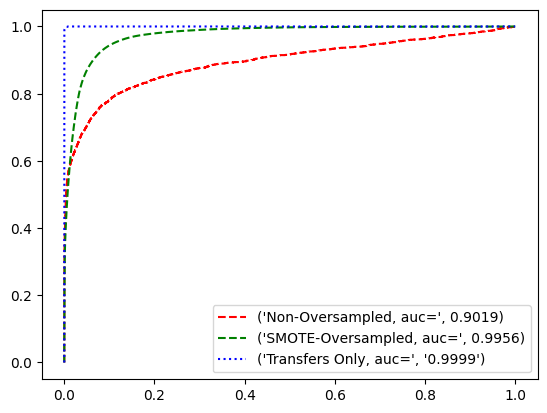

In [133]:
#Figure Show
plt.plot(fprLR_NO,tprLR_NO,linestyle='dashed',color='red',label=("Non-Oversampled, auc=",(round(aucLR_NO,4))))
plt.plot(fprLR_SMT,tprLR_SMT,linestyle='dashed',color='green',label=("SMOTE-Oversampled, auc=",(round(aucLR_SMT,4))))
plt.plot(fprLR_transfers,tprLR_transfers,color='blue',linestyle=':',label=("Transfers Only, auc=",str(round(aucLR_transfers,4))))
plt.legend()
plt.show()

### 2) LINEAR SVM

#### i) Non-Oversampled Data

In [80]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

LinearSVC_NO = make_pipeline(StandardScaler(), LinearSVC(dual=False, random_state=0, tol=1e-5))

In [81]:
LinearSVC_NO.fit(x_train_NO,y_train_NO)

y_pred_NO_SVC = LinearSVC_NO.predict(x_test_NO)

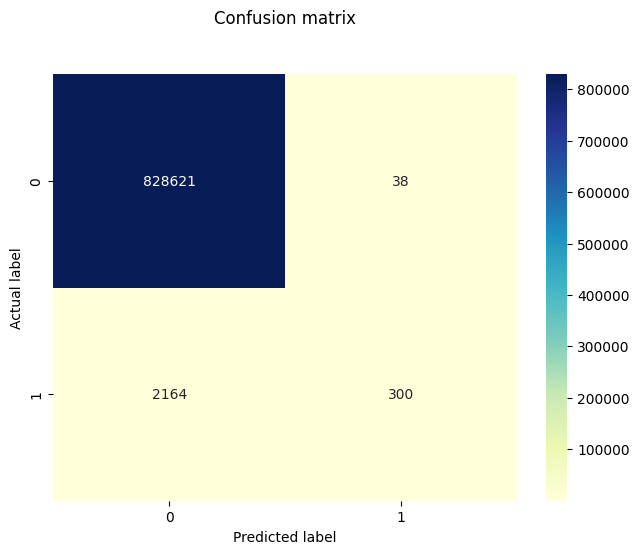

In [82]:
#Confusion Matrix
SVC_NO_cnfMat = metrics.confusion_matrix(y_test_NO, y_pred_NO_SVC)

Plot_Confusion_Matrix(SVC_NO_cnfMat,classes=[0,1])

In [88]:
#Classification Report
print("Classification report for Linear Support Vector Classifier on Non-Oversampled Data: \n")
print(classification_report(y_test_NO, y_pred_NO_SVC, target_names=['not Fraud', 'Fraud']))

Classification report for Linear Support Vector Classifier on Non-Oversampled Data: 

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.89      0.12      0.21      2464

    accuracy                           1.00    831123
   macro avg       0.94      0.56      0.61    831123
weighted avg       1.00      1.00      1.00    831123



#### ii) Complete Oversampled Data

In [85]:
LinearSVC_SMT = make_pipeline(StandardScaler(), LinearSVC(dual=False, random_state=0, tol=1e-5))

In [86]:
LinearSVC_SMT.fit(x_train_smt,y_train_smt)

y_pred_SMT_SVC = LinearSVC_SMT.predict(x_test_smt)

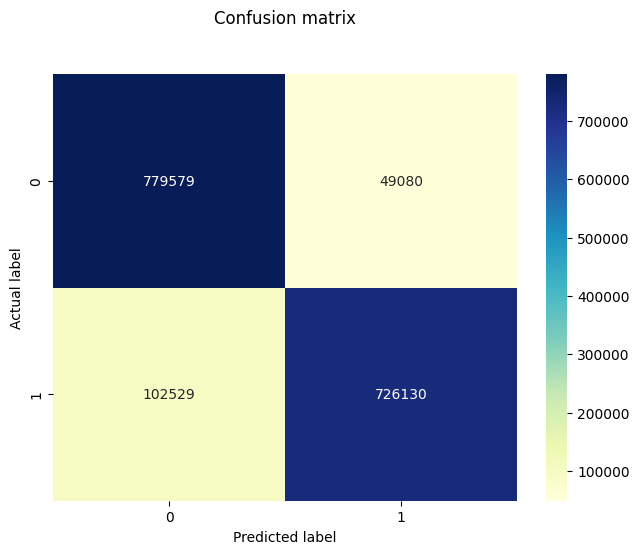

In [87]:
#Confusion Matrix
SVC_SMT_cnfMat = metrics.confusion_matrix(y_test_smt, y_pred_SMT_SVC)

Plot_Confusion_Matrix(SVC_SMT_cnfMat,classes=[0,1])

In [89]:
#Classification Report
print("Classification report for Linear Support Vector Classifier on SMOTE Oversampled Data: \n")
print(classification_report(y_test_smt, y_pred_SMT_SVC, target_names=['not Fraud', 'Fraud']))

Classification report for Linear Support Vector Classifier on SMOTE Oversampled Data: 

              precision    recall  f1-score   support

   not Fraud       0.88      0.94      0.91    828659
       Fraud       0.94      0.88      0.91    828659

    accuracy                           0.91   1657318
   macro avg       0.91      0.91      0.91   1657318
weighted avg       0.91      0.91      0.91   1657318



### 3) NAIVE BAYES

#### i) Non-Oversampled Data

In [175]:
from sklearn.naive_bayes import GaussianNB

GNB_NO = GaussianNB()

In [176]:
GNB_NO.fit(x_train_NO,y_train_NO)

yPred_GNB_NO = GNB_NO.predict(x_test_NO)

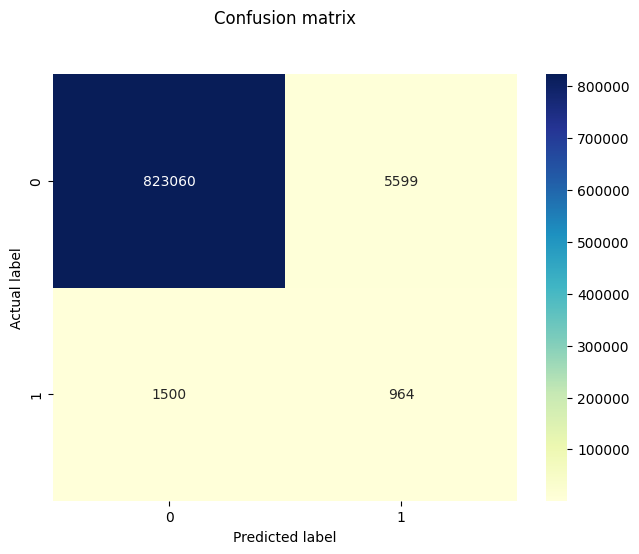

In [177]:
#Confusion Matrix
GNB_NO_cnfMat = metrics.confusion_matrix(y_test_NO, yPred_GNB_NO)

Plot_Confusion_Matrix(GNB_NO_cnfMat)

In [178]:
#Classification Report
print("Classification report for Naive Bayes Classifier Non-Oversampled Data:\n")
print(classification_report(y_test_NO, yPred_GNB_NO, target_names=['not Fraud', 'Fraud']))

Classification report for Naive Bayes Classifier Non-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      0.99      1.00    828659
       Fraud       0.15      0.39      0.21      2464

    accuracy                           0.99    831123
   macro avg       0.57      0.69      0.60    831123
weighted avg       1.00      0.99      0.99    831123



#### ii) Complete Oversampled Data

In [179]:
from sklearn.naive_bayes import GaussianNB

GNB_SMT = GaussianNB()

In [180]:
GNB_SMT.fit(x_train_smt,y_train_smt)

yPred_GNB_SMT = GNB_SMT.predict(x_test_smt)

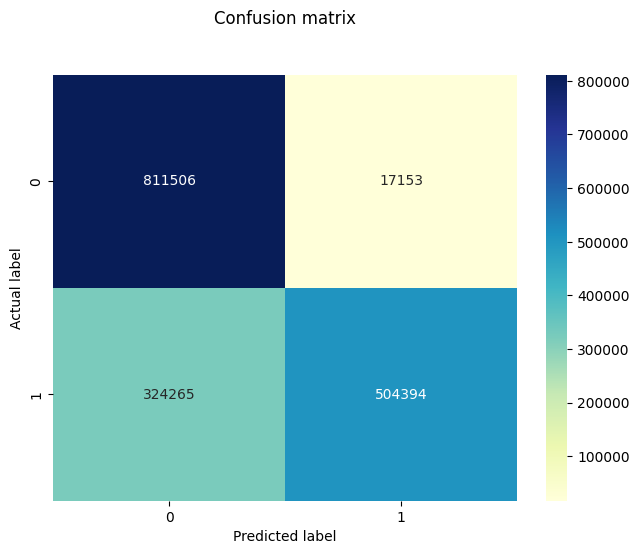

In [181]:
#Confusion Matrix
GNB_SMT_cnfMat = metrics.confusion_matrix(y_test_smt, yPred_GNB_SMT)

Plot_Confusion_Matrix(GNB_SMT_cnfMat)

In [182]:
#Classification Report
print("Classification report for Naive Bayes Classifier SMOTE-Oversampled Data:\n")
print(classification_report(y_test_smt, yPred_GNB_SMT, target_names=['not Fraud', 'Fraud']))

Classification report for Naive Bayes Classifier SMOTE-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       0.71      0.98      0.83    828659
       Fraud       0.97      0.61      0.75    828659

    accuracy                           0.79   1657318
   macro avg       0.84      0.79      0.79   1657318
weighted avg       0.84      0.79      0.79   1657318



In [183]:
#Plotting ROC curves 
y_GNB_NO_proba = GNB_NO.predict_proba(x_test_NO)[::,1]
y_GNB_SMT_proba = GNB_SMT.predict_proba(x_test_smt)[::,1]

fprGNB_NO, tprGNB_NO, _ = metrics.roc_curve(y_test_NO,  y_GNB_NO_proba)
fprGNB_SMT, tprGNB_SMT, _ = metrics.roc_curve(y_test_smt,  y_GNB_SMT_proba)

aucGNB_NO = metrics.roc_auc_score(y_test_NO, y_GNB_NO_proba)
aucGNB_SMT = metrics.roc_auc_score(y_test_smt, y_GNB_SMT_proba)

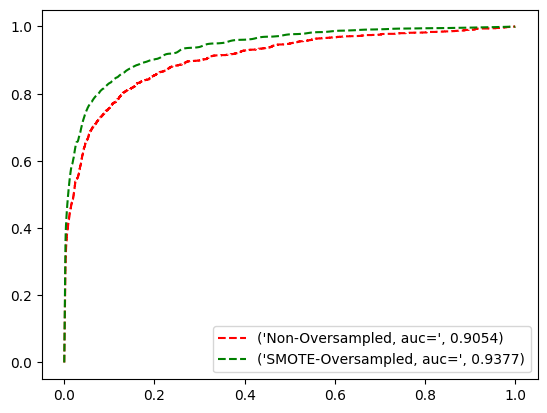

In [184]:
#Figure Show
plt.plot(fprGNB_NO, tprGNB_NO,linestyle='dashed',color='red',label=("Non-Oversampled, auc=",(round(aucGNB_NO,4))))
plt.plot(fprGNB_SMT, tprGNB_SMT,linestyle='dashed',color='green',label=("SMOTE-Oversampled, auc=",(round(aucGNB_SMT,4))))
plt.legend()
plt.show()

### 4) k-NEAREST NEIGHBOURS

#### i) Non-Oversampled Data

#### a)  k=3

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

kNN3_NO = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

In [92]:
kNN3_NO.fit(x_train_NO,y_train_NO)

y_pred_kNN3_NO = kNN3_NO.predict(x_test_NO)

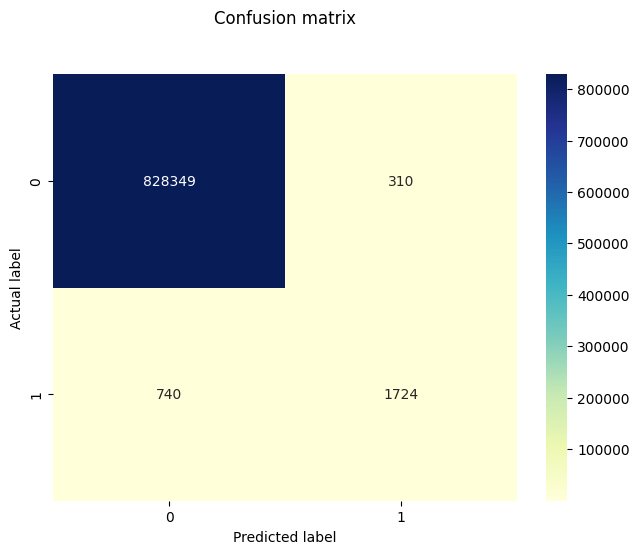

In [93]:
#Confusion Matrix
kNN3_NO_cnfMat = metrics.confusion_matrix(y_test_NO, y_pred_kNN3_NO)

Plot_Confusion_Matrix(kNN3_NO_cnfMat)

In [95]:
#Classification Report
print("Classification report for k=3 for Non-Oversampled Data:\n")
print(classification_report(y_test_NO, y_pred_kNN3_NO, target_names=['not Fraud', 'Fraud']))

Classification report for k=3 for Non-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.85      0.70      0.77      2464

    accuracy                           1.00    831123
   macro avg       0.92      0.85      0.88    831123
weighted avg       1.00      1.00      1.00    831123



#### b) k=5

In [99]:
kNN5_NO = KNeighborsClassifier(n_neighbors=5)

In [100]:
kNN5_NO.fit(x_train_NO,y_train_NO)

KNeighborsClassifier()

In [101]:
y_pred_kNN5_NO = kNN5_NO.predict(x_test_NO)

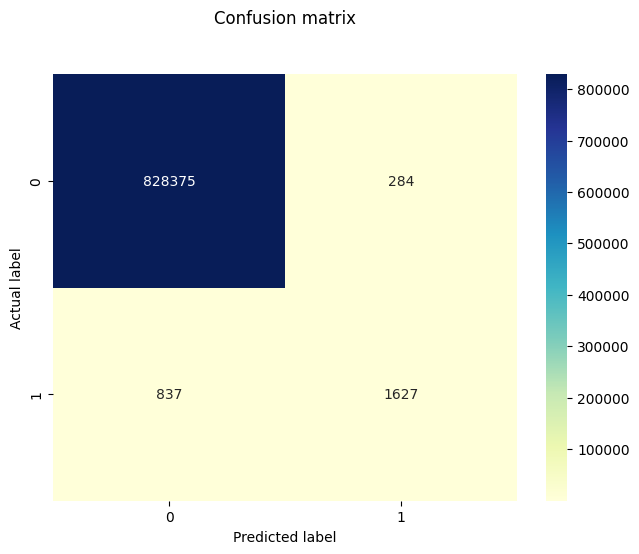

In [102]:
#Confusion Matrix
kNN5_NO_cnfMat = metrics.confusion_matrix(y_test_NO, y_pred_kNN5_NO)

Plot_Confusion_Matrix(kNN5_NO_cnfMat)

In [103]:
#Classification Report
print("Classification report for k=5 for Non-Oversampled Data:\n")
print(classification_report(y_test_NO, y_pred_kNN5_NO, target_names=['not Fraud', 'Fraud']))

Classification report for k=5 for Non-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.85      0.66      0.74      2464

    accuracy                           1.00    831123
   macro avg       0.93      0.83      0.87    831123
weighted avg       1.00      1.00      1.00    831123



#### ii) Complete Oversampled Data

#### c) k=10

In [104]:
kNN10_SMT = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
kNN10_SMT.fit(x_train_smt, y_train_smt)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [105]:
#Predict
y_pred_kNN10_SMT = kNN10_SMT.predict(x_test_smt)

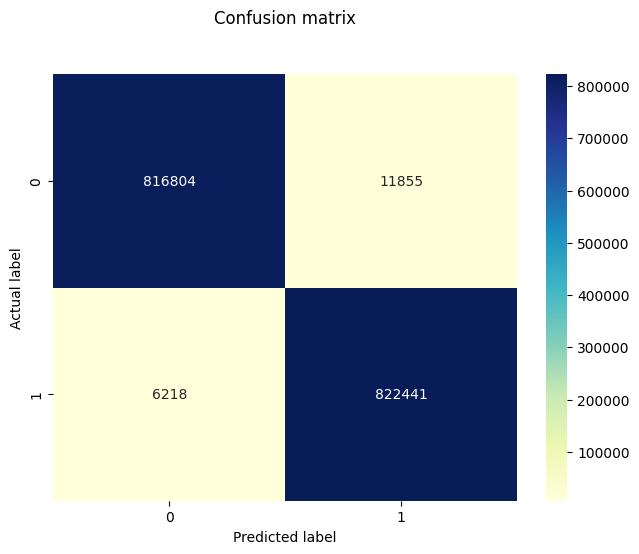

In [106]:
#Confusion Matrix
kNN10_SMT_cnfMat = metrics.confusion_matrix(y_test_smt, y_pred_kNN10_SMT)

Plot_Confusion_Matrix(kNN10_SMT_cnfMat)

In [108]:
#Classification Report
print("Classification report for k=10 for Oversampled Data:\n")
print(classification_report(y_test_smt, y_pred_kNN10_SMT, target_names=['not Fraud', 'Fraud']))

Classification report for k=10 for Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       0.99      0.99      0.99    828659
       Fraud       0.99      0.99      0.99    828659

    accuracy                           0.99   1657318
   macro avg       0.99      0.99      0.99   1657318
weighted avg       0.99      0.99      0.99   1657318



In [185]:
#Plotting ROC curves for all values of k
y_predKNN3_NO_proba = kNN3_NO.predict_proba(x_test_NO)[::,1]
y_predKNN5_NO_proba = kNN5_NO.predict_proba(x_test_NO)[::,1]
y_predKNN10_SMT_proba = kNN10_SMT.predict_proba(x_test_smt)[::,1]

In [186]:
fpr3, tpr3, _ = metrics.roc_curve(y_test_NO,  y_predKNN3_NO_proba)
fpr5, tpr5, _ = metrics.roc_curve(y_test_NO,  y_predKNN5_NO_proba)
fpr10, tpr10, _ = metrics.roc_curve(y_test_smt,  y_predKNN10_SMT_proba)

auc3 = metrics.roc_auc_score(y_test_NO, y_predKNN3_NO_proba)
auc5 = metrics.roc_auc_score(y_test_NO, y_predKNN5_NO_proba)
auc10 = metrics.roc_auc_score(y_test_smt, y_predKNN10_SMT_proba)

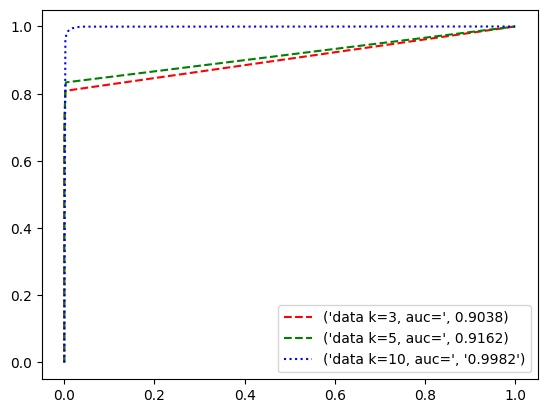

In [187]:
#Figure Show
plt.plot(fpr3,tpr3,linestyle='dashed',color='red',label=("data k=3, auc=",(round(auc3,4))))
plt.plot(fpr5,tpr5,linestyle='dashed',color='green',label=("data k=5, auc=",(round(auc5,4))))
plt.plot(fpr10,tpr10,color='blue',linestyle=':',label=("data k=10, auc=",str(round(auc10,4))))
plt.legend()
plt.show()

### 5) DECISION TREE CLASSIFIER

#### i) Non-Oversampled Data

In [112]:
from sklearn.tree import DecisionTreeClassifier

dTree_clf_NO = DecisionTreeClassifier()
dTree_clf_NO.fit(x_train_NO,y_train_NO)

DecisionTreeClassifier()

In [113]:
y_predDTree_NO = dTree_clf_NO.predict(x_test_NO)

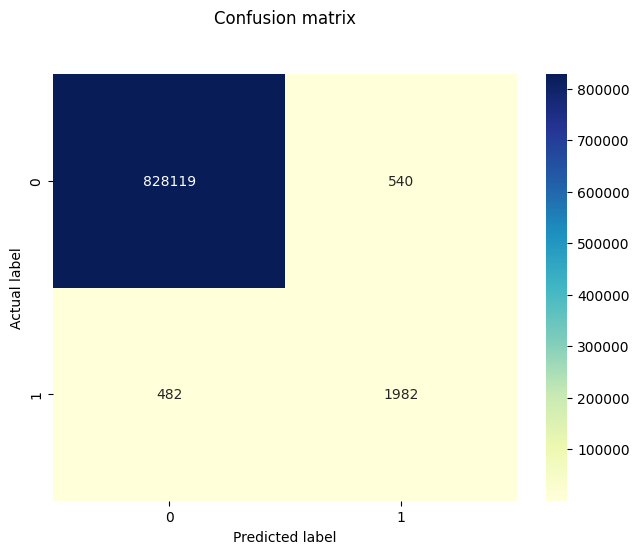

In [114]:
#Confusion Matrix
DTree_NO_cnfMat = metrics.confusion_matrix(y_test_NO, y_predDTree_NO)

Plot_Confusion_Matrix(DTree_NO_cnfMat)

In [115]:
#Classification Report
print("Classification report for Decision Tree classifier for Non-Oversampled Data:\n")
print(classification_report(y_test_NO, y_predDTree_NO, target_names=['not Fraud', 'Fraud']))

Classification report for Decision Tree classifier for Non-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.79      0.80      0.80      2464

    accuracy                           1.00    831123
   macro avg       0.89      0.90      0.90    831123
weighted avg       1.00      1.00      1.00    831123



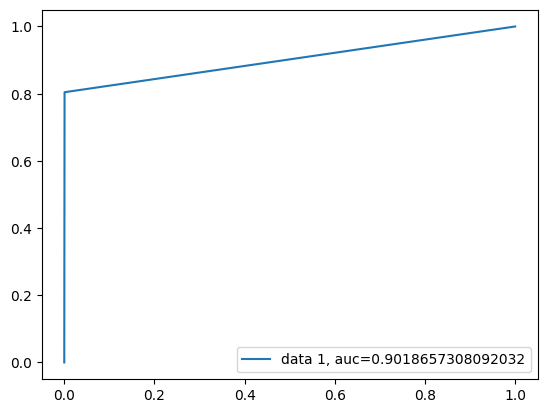

In [116]:
Plot_ROC(dTree_clf_NO, x_test_NO, y_test_NO)

#### ii) Complete Oversampled Data

In [117]:
from sklearn.tree import DecisionTreeClassifier

dTree_clf_SMT = DecisionTreeClassifier()
dTree_clf_SMT.fit(x_train_smt,y_train_smt)

DecisionTreeClassifier()

In [118]:
y_predDTree_SMT = dTree_clf_SMT.predict(x_test_smt)

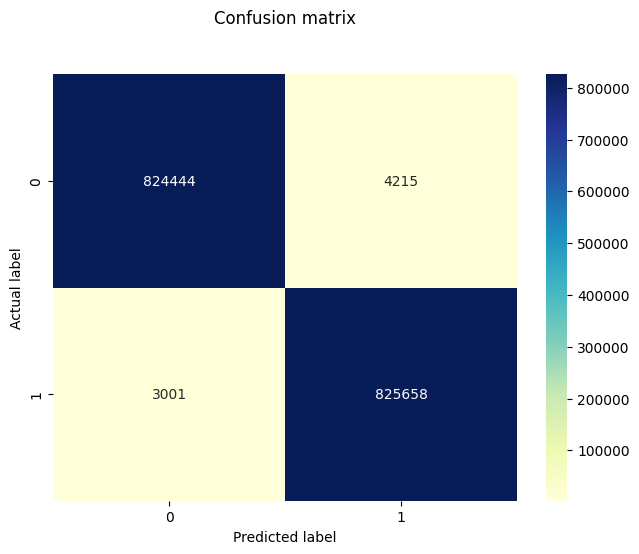

In [120]:
#Confusion Matrix
DTree_SMT_cnfMat = metrics.confusion_matrix(y_test_smt, y_predDTree_SMT)

Plot_Confusion_Matrix(DTree_SMT_cnfMat)

In [121]:
#Classification Report
print("Classification report for Decision Tree classifier for SMOTE-Oversampled Data:\n")
print(classification_report(y_test_smt, y_predDTree_SMT, target_names=['not Fraud', 'Fraud']))

Classification report for Decision Tree classifier for SMOTE-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      0.99      1.00    828659
       Fraud       0.99      1.00      1.00    828659

    accuracy                           1.00   1657318
   macro avg       1.00      1.00      1.00   1657318
weighted avg       1.00      1.00      1.00   1657318



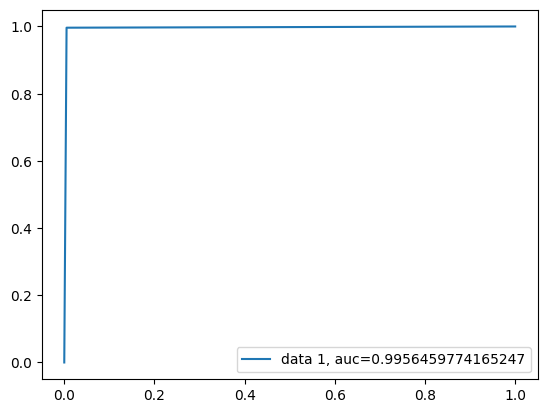

In [122]:
Plot_ROC(dTree_clf_SMT, x_test_smt, y_test_smt)

In [127]:
#Plotting ROC curves for all values of k
y_dTree_NO_proba = dTree_clf_NO.predict_proba(x_test_NO)[::,1]
y_dTree_SMT_proba = dTree_clf_SMT.predict_proba(x_test_smt)[::,1]

fprdTree_NO, tprdTree_NO, _ = metrics.roc_curve(y_test_NO,  y_dTree_NO_proba)
fprdTree_SMT, tprdTree_SMT, _ = metrics.roc_curve(y_test_smt,  y_dTree_SMT_proba)

aucdTree_NO = metrics.roc_auc_score(y_test_NO, y_dTree_NO_proba)
aucdTree_SMT = metrics.roc_auc_score(y_test_smt, y_dTree_SMT_proba)

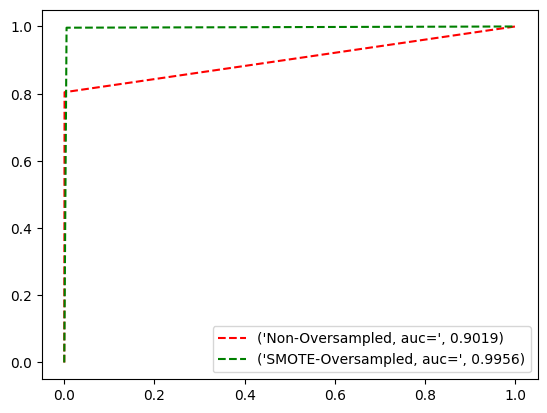

In [132]:
#Figure Show
plt.plot(fprdTree_NO,tprdTree_NO,linestyle='dashed',color='red',label=("Non-Oversampled, auc=",(round(aucdTree_NO,4))))
plt.plot(fprdTree_SMT, tprdTree_SMT,linestyle='dashed',color='green',label=("SMOTE-Oversampled, auc=",(round(aucdTree_SMT,4))))
plt.legend()
plt.show()

### 6) XG-BOOST TREES CLASSIFIER

#### i) Non-Oversampled Data

In [129]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_predict
#from numpy import loadtxt
from xgboost import XGBClassifier

modelXGB_NO = XGBClassifier()
modelXGB_NO.fit(x_train_NO, y_train_NO)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [130]:
yPred_XGB_NO = modelXGB_NO.predict(x_test_NO)

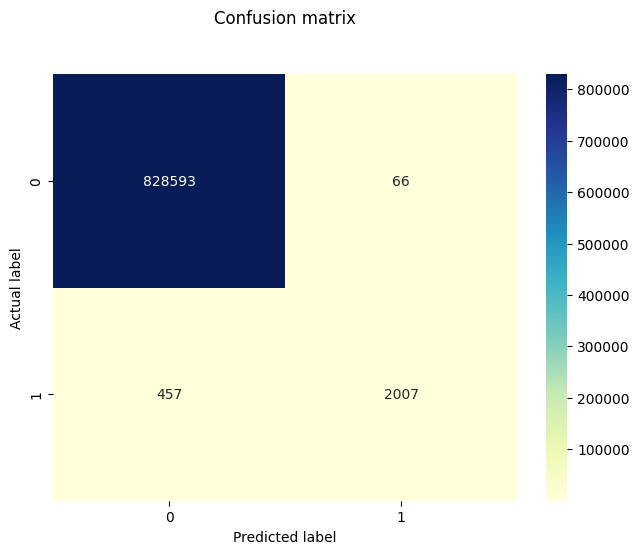

In [131]:
#Confusion Matrix
XGB_NO_cnfMat = metrics.confusion_matrix(y_test_NO, yPred_XGB_NO)

Plot_Confusion_Matrix(XGB_NO_cnfMat)

In [134]:
#Classification Report
print("Classification report for XGBoost classifier for Non-Oversampled Data:\n")
print(classification_report(y_test_NO, yPred_XGB_NO, target_names=['not Fraud', 'Fraud']))

Classification report for XGBoost classifier for Non-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.97      0.81      0.88      2464

    accuracy                           1.00    831123
   macro avg       0.98      0.91      0.94    831123
weighted avg       1.00      1.00      1.00    831123



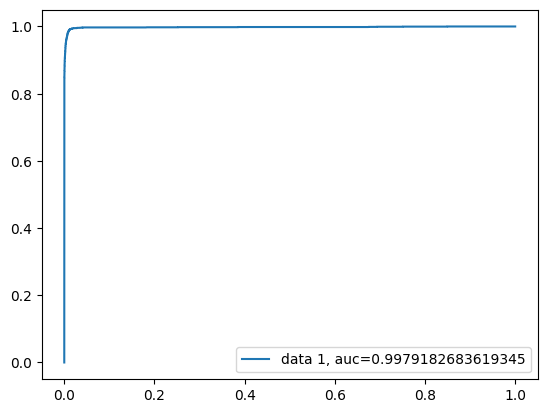

In [135]:
Plot_ROC(modelXGB_NO, x_test_NO, y_test_NO)

#### ii) Complete Oversampled Data

In [136]:
#from xgboost import XGBClassifier

modelXGB_SMT = XGBClassifier()

In [137]:
modelXGB_SMT.fit(x_train_smt, y_train_smt)

yPred_XGB_SMT = modelXGB_SMT.predict(x_test_smt)

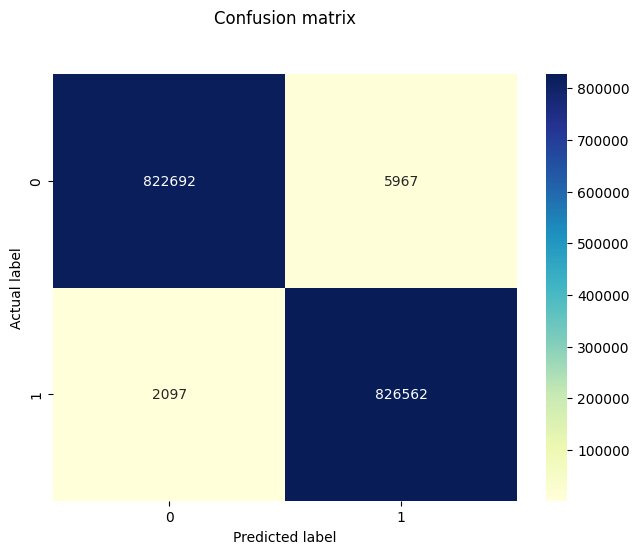

In [138]:
#Confusion Matrix
XGB_SMT_cnfMat = metrics.confusion_matrix(y_test_smt, yPred_XGB_SMT)

Plot_Confusion_Matrix(XGB_SMT_cnfMat)

In [139]:
#Classification Report
print("Classification report for XGBoost Tree classifier for SMOTE-Oversampled Data:\n")
print(classification_report(y_test_smt, yPred_XGB_SMT, target_names=['not Fraud', 'Fraud']))

Classification report for XGBoost Tree classifier for SMOTE-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      0.99      1.00    828659
       Fraud       0.99      1.00      1.00    828659

    accuracy                           1.00   1657318
   macro avg       1.00      1.00      1.00   1657318
weighted avg       1.00      1.00      1.00   1657318



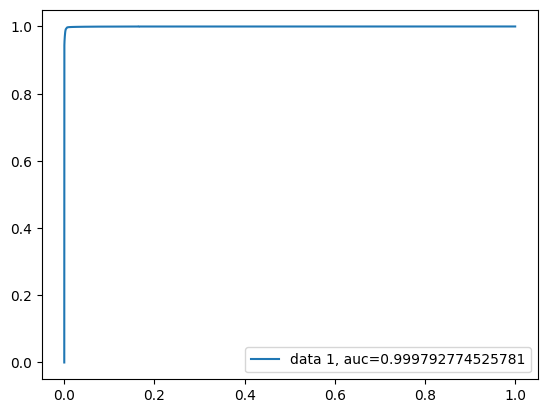

In [140]:
Plot_ROC(modelXGB_SMT, x_test_smt, y_test_smt)

In [142]:
#Plotting ROC curves for all values of k
y_XGB_NO_proba = modelXGB_NO.predict_proba(x_test_NO)[::,1]
y_XGB_SMT_proba = modelXGB_SMT.predict_proba(x_test_smt)[::,1]

fprXGB_NO, tprXGB_NO, _ = metrics.roc_curve(y_test_NO,  y_XGB_NO_proba)
fprXGB_SMT, tprXGB_SMT, _ = metrics.roc_curve(y_test_smt,  y_XGB_SMT_proba)

aucXGB_NO = metrics.roc_auc_score(y_test_NO, y_XGB_NO_proba)
aucXGB_SMT = metrics.roc_auc_score(y_test_smt, y_XGB_SMT_proba)

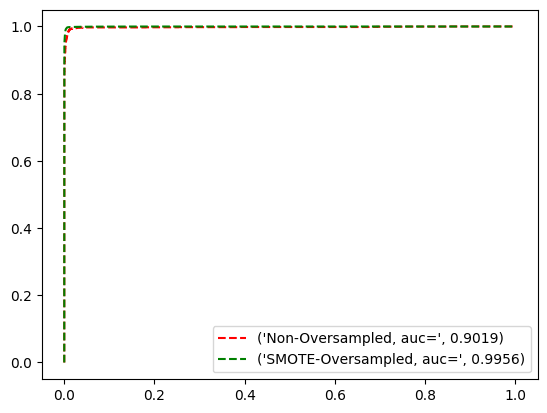

In [145]:
#Figure Show
plt.plot(fprXGB_NO, tprXGB_NO,linestyle='dashed',color='red',label=("Non-Oversampled, auc=",(round(aucdTree_NO,4))))
plt.plot(fprXGB_SMT, tprXGB_SMT,linestyle='dashed',color='green',label=("SMOTE-Oversampled, auc=",(round(aucdTree_SMT,4))))
plt.legend()
plt.show()

### 7) LINEAR DISCRIMINANT ANALYSIS

#### i) Non-Oversampled Data

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_NO = LinearDiscriminantAnalysis()

In [147]:
LDA_NO.fit(x_train_NO, y_train_NO)

yPred_LDA_NO = LDA_NO.predict(x_test_NO)

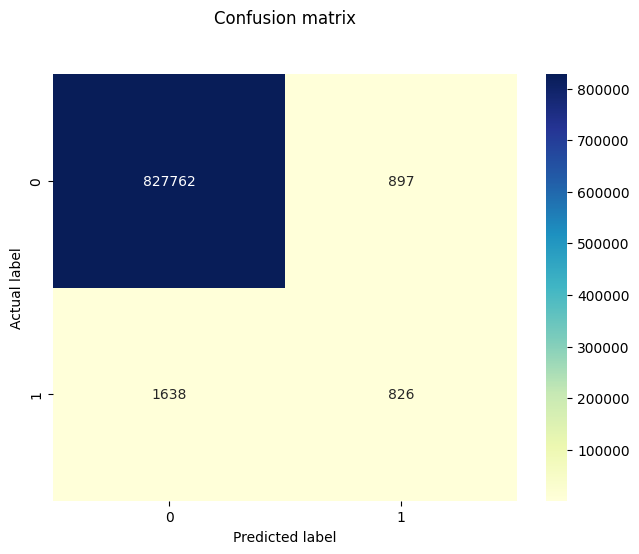

In [149]:
#Confusion Matrix
LDA_NO_cnfMat = metrics.confusion_matrix(y_test_NO, yPred_LDA_NO)

Plot_Confusion_Matrix(LDA_NO_cnfMat)

In [150]:
#Classification Report
print("Classification report for LDA Classifier for Non-Oversampled Data:\n")
print(classification_report(y_test_NO, yPred_LDA_NO, target_names=['not Fraud', 'Fraud']))

Classification report for LDA Classifier for Non-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.48      0.34      0.39      2464

    accuracy                           1.00    831123
   macro avg       0.74      0.67      0.70    831123
weighted avg       1.00      1.00      1.00    831123



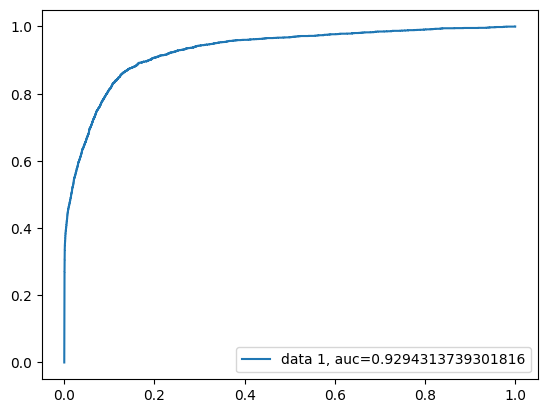

In [151]:
Plot_ROC(LDA_NO, x_test_NO, y_test_NO)

#### ii) Complete Oversampled Data

In [152]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_SMT = LinearDiscriminantAnalysis()

In [153]:
LDA_SMT.fit(x_train_smt, y_train_smt)

yPred_LDA_SMT = LDA_SMT.predict(x_test_smt)

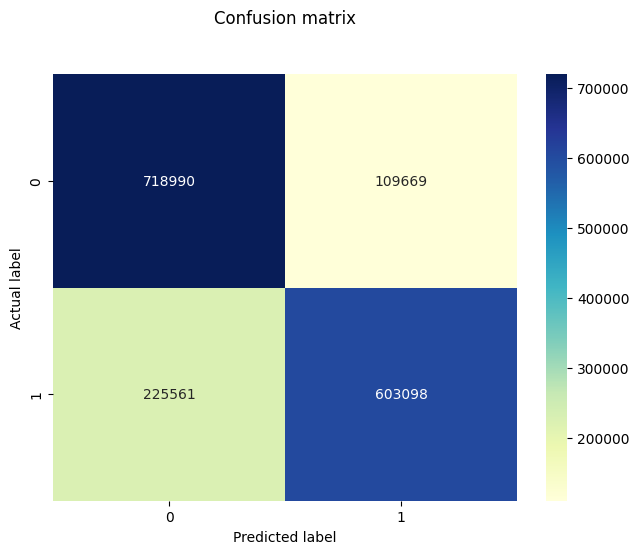

In [154]:
#Confusion Matrix
LDA_SMT_cnfMat = metrics.confusion_matrix(y_test_smt, yPred_LDA_SMT)

Plot_Confusion_Matrix(LDA_SMT_cnfMat)

In [155]:
#Classification Report
print("Classification report for LDA Classifier for SMOTE-Oversampled Data:\n")
print(classification_report(y_test_smt, yPred_LDA_SMT, target_names=['not Fraud', 'Fraud']))

Classification report for LDA Classifier for SMOTE-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       0.76      0.87      0.81    828659
       Fraud       0.85      0.73      0.78    828659

    accuracy                           0.80   1657318
   macro avg       0.80      0.80      0.80   1657318
weighted avg       0.80      0.80      0.80   1657318



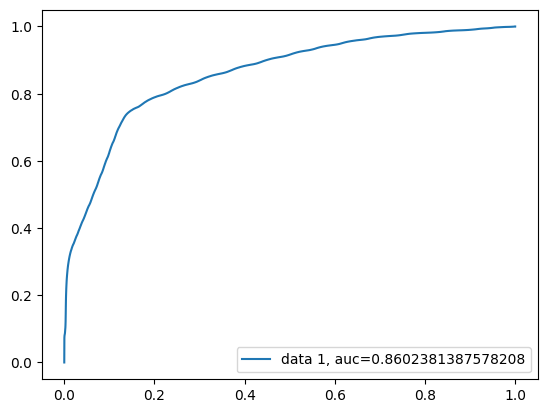

In [156]:
Plot_ROC(LDA_SMT, x_test_smt, y_test_smt)

In [157]:
#Plotting ROC curves for all values of k
y_LDA_NO_proba = LDA_NO.predict_proba(x_test_NO)[::,1]
y_LDA_SMT_proba = LDA_SMT.predict_proba(x_test_smt)[::,1]

fprLDA_NO, tprLDA_NO, _ = metrics.roc_curve(y_test_NO,  y_LDA_NO_proba)
fprLDA_SMT, tprLDA_SMT, _ = metrics.roc_curve(y_test_smt,  y_LDA_SMT_proba)

aucLDA_NO = metrics.roc_auc_score(y_test_NO, y_LDA_NO_proba)
aucLDA_SMT = metrics.roc_auc_score(y_test_smt, y_LDA_SMT_proba)

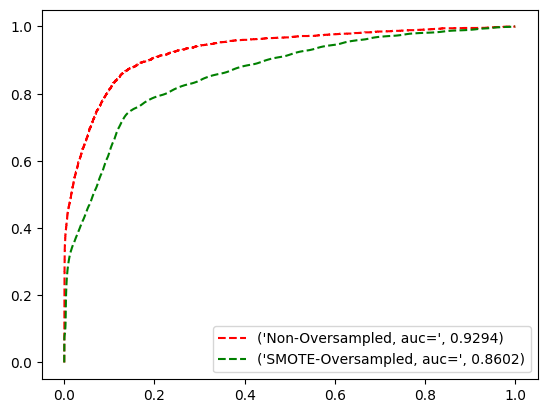

In [159]:
#Figure Show
plt.plot(fprLDA_NO, tprLDA_NO,linestyle='dashed',color='red',label=("Non-Oversampled, auc=",(round(aucLDA_NO,4))))
plt.plot(fprLDA_SMT, tprLDA_SMT,linestyle='dashed',color='green',label=("SMOTE-Oversampled, auc=",(round(aucLDA_SMT,4))))
plt.legend()
plt.show()

### 8) MLP CLASSIFIER (NEURAL NETWORK)

#### i) Non-Oversampled Data

In [164]:
from sklearn.neural_network import MLPClassifier

clf_MLP_NO = MLPClassifier(solver='adam', alpha=0.0001, 
                        hidden_layer_sizes=(5, 2), random_state=1,max_iter=600)

In [165]:
clf_MLP_NO.fit(x_train_NO, y_train_NO)

yPred_MLP_NO = clf_MLP_NO.predict(x_test_NO)

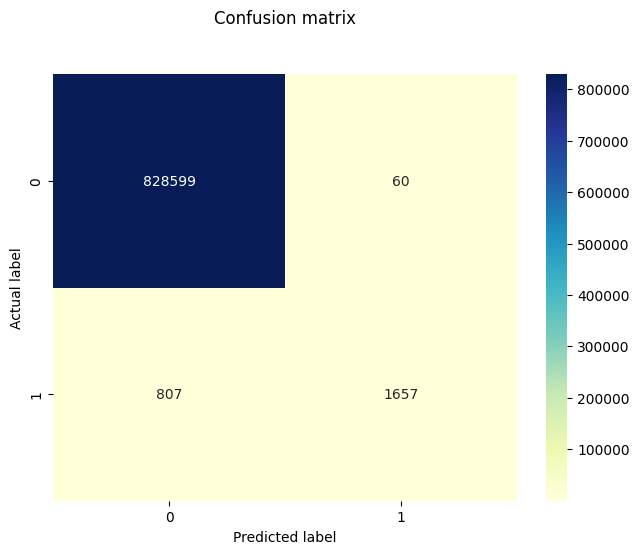

In [166]:
#Confusion Matrix
MLP_NO_cnfMat = metrics.confusion_matrix(y_test_NO, yPred_MLP_NO)

Plot_Confusion_Matrix(MLP_NO_cnfMat)

In [167]:
#Classification Report
print("Classification report for 5-Layer Perceptron Classifier for Non-Oversampled Data:\n")
print(classification_report(y_test_NO, yPred_MLP_NO, target_names=['not Fraud', 'Fraud']))

Classification report for 5-Layer Perceptron Classifier for Non-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.97      0.67      0.79      2464

    accuracy                           1.00    831123
   macro avg       0.98      0.84      0.90    831123
weighted avg       1.00      1.00      1.00    831123



#### ii) Complete Oversampled Data

In [168]:
from sklearn.neural_network import MLPClassifier

clf_MLP_SMT = MLPClassifier(solver='adam', alpha=0.0001, 
                        hidden_layer_sizes=(5, 2), random_state=1,max_iter=600)

In [169]:
clf_MLP_SMT.fit(x_train_smt, y_train_smt)

yPred_MLP_SMT = clf_MLP_SMT.predict(x_test_smt)

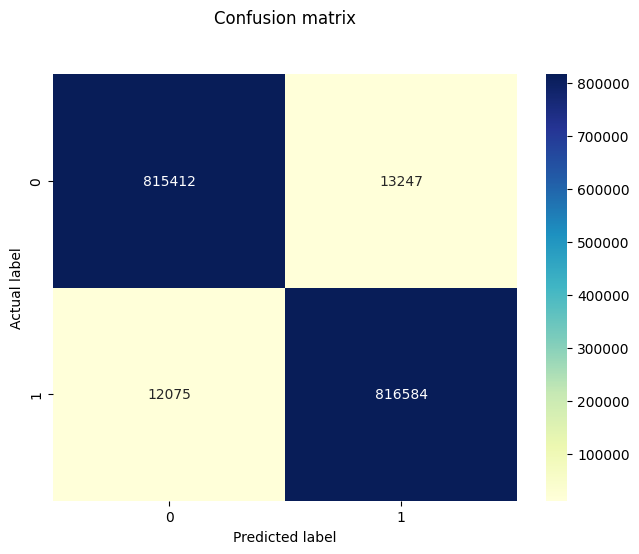

In [170]:
#Confusion Matrix
MLP_SMT_cnfMat = metrics.confusion_matrix(y_test_smt, yPred_MLP_SMT)

Plot_Confusion_Matrix(MLP_SMT_cnfMat)

In [171]:
#Classification Report
print("Classification report for 5-Layer Perceptron Classifier for SMOTE-Oversampled Data:\n")
print(classification_report(y_test_smt, yPred_MLP_SMT, target_names=['not Fraud', 'Fraud']))

Classification report for 5-Layer Perceptron Classifier for SMOTE-Oversampled Data:

              precision    recall  f1-score   support

   not Fraud       0.99      0.98      0.98    828659
       Fraud       0.98      0.99      0.98    828659

    accuracy                           0.98   1657318
   macro avg       0.98      0.98      0.98   1657318
weighted avg       0.98      0.98      0.98   1657318



In [172]:
#Plotting ROC curves 
y_MLP_NO_proba = clf_MLP_NO.predict_proba(x_test_NO)[::,1]
y_MLP_SMT_proba = clf_MLP_SMT.predict_proba(x_test_smt)[::,1]

fprMLP_NO, tprMLP_NO, _ = metrics.roc_curve(y_test_NO,  y_MLP_NO_proba)
fprMLP_SMT, tprMLP_SMT, _ = metrics.roc_curve(y_test_smt,  y_MLP_SMT_proba)

aucMLP_NO = metrics.roc_auc_score(y_test_NO, y_MLP_NO_proba)
aucMLP_SMT = metrics.roc_auc_score(y_test_smt, y_MLP_SMT_proba)

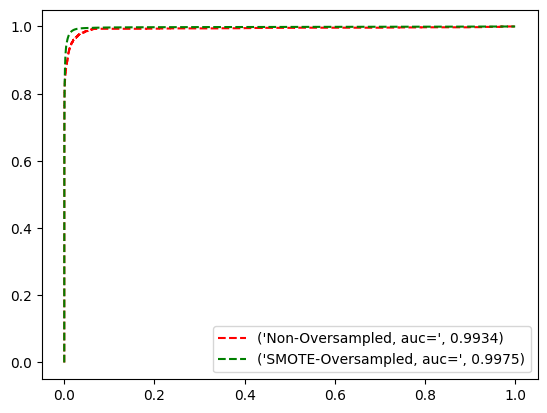

In [174]:
#Figure Show
plt.plot(fprMLP_NO, tprMLP_NO,linestyle='dashed',color='red',label=("Non-Oversampled, auc=",(round(aucMLP_NO,4))))
plt.plot(fprMLP_SMT, tprMLP_SMT,linestyle='dashed',color='green',label=("SMOTE-Oversampled, auc=",(round(aucMLP_SMT,4))))
plt.legend()
plt.show()

## MODEL PERFORMANCE COMPARISON PLOT

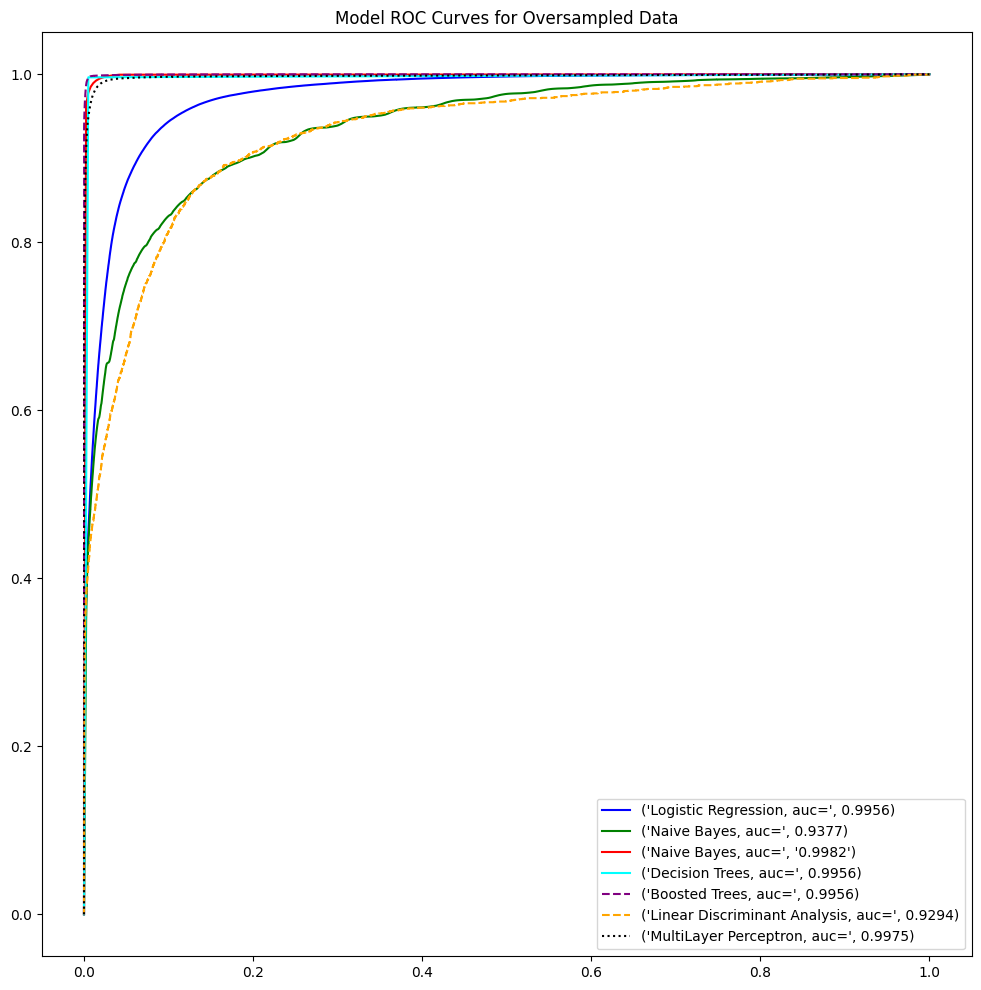

In [202]:
#Combined Figure Show
plt.figure(figsize=(12,12))
plt.title("Model ROC Curves for Oversampled Data")
plt.plot(fprLR_SMT,tprLR_SMT,linestyle='solid',color='blue',label=("Logistic Regression, auc=",(round(aucLR_SMT,4))))
plt.plot(fprGNB_SMT, tprGNB_SMT,linestyle='solid',color='green',label=("Naive Bayes, auc=",(round(aucGNB_SMT,4))))
plt.plot(fpr10,tpr10,color='red',linestyle='solid',label=("Naive Bayes, auc=",str(round(auc10,4))))
plt.plot(fprdTree_SMT, tprdTree_SMT,linestyle='solid',color='cyan',label=("Decision Trees, auc=",(round(aucdTree_SMT,4))))
plt.plot(fprXGB_SMT, tprXGB_SMT,linestyle='dashed',color='purple',label=("Boosted Trees, auc=",(round(aucdTree_SMT,4))))
plt.plot(fprLDA_NO, tprLDA_NO,linestyle='dashed',color='orange',label=("Linear Discriminant Analysis, auc=",(round(aucLDA_NO,4))))
plt.plot(fprMLP_SMT, tprMLP_SMT,linestyle=':',color='black',label=("MultiLayer Perceptron, auc=",(round(aucMLP_SMT,4))))
plt.legend()
plt.show()